In [13]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [27]:
# load data
(X_train, y_valid), (X_valid, y_valid) = mnist.load_data()

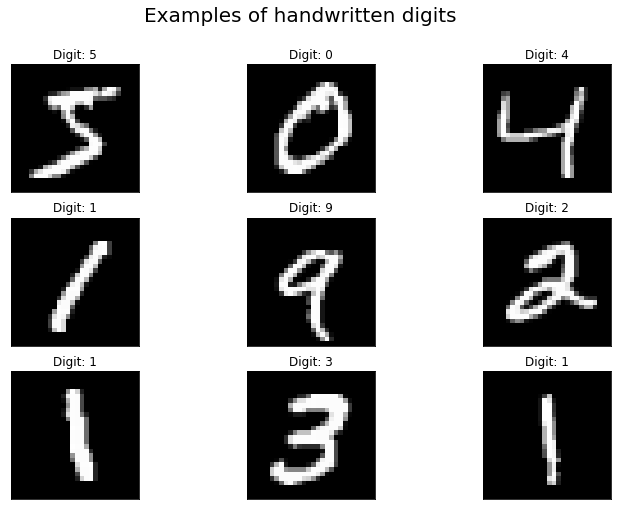

In [28]:
# visualize data
fig = plt.figure(figsize=(12, 8))
plt.suptitle("Examples of handwritten digits", fontsize=20)
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

plt.show()

In [29]:
# (image of desired neural network architecture above)
# pre-process images
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_valid = X_valid.reshape(X_valid.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_valid = X_valid / 255

In [34]:
# convert labels to categorical vectors
y_train_categorical = np_utils.to_categorical(y_train)
y_valid_categorical = np_utils.to_categorical(y_valid)
num_classes = y_valid_cateogrical.shape[1]

In [31]:
# create model
digit_predictor = Sequential()
digit_predictor.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
digit_predictor.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

digit_predictor.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [32]:
# train model
digit_predictor.fit(X_train, y_train_categorical, epochs=10, batch_size=100, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.2228 - acc: 0.9347
Epoch 2/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0880 - acc: 0.9736
Epoch 3/10
60000/60000 [==============================] - 10s 158us/step - loss: 0.0574 - acc: 0.9827
Epoch 4/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.0416 - acc: 0.9874
Epoch 5/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0304 - acc: 0.9907
Epoch 6/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0218 - acc: 0.9933
Epoch 7/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0164 - acc: 0.9950
Epoch 8/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.0124 - acc: 0.9963
Epoch 9/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0102 - acc: 0.9969
Epoch 10/10
60000/60000 [==============================] - 10s 162us/step - loss: 

In [36]:
# evaluate on validation data
validation_scores = digit_predictor.evaluate(X_valid, y_valid_categorical, verbose=0)
print 'Validation accuracy:', validation_scores[1]

Validation accuracy: 0.9842


In [43]:
# get all predictions on validation data
y_predicted = digit_predictor.predict_classes(X_valid).reshape(-1)

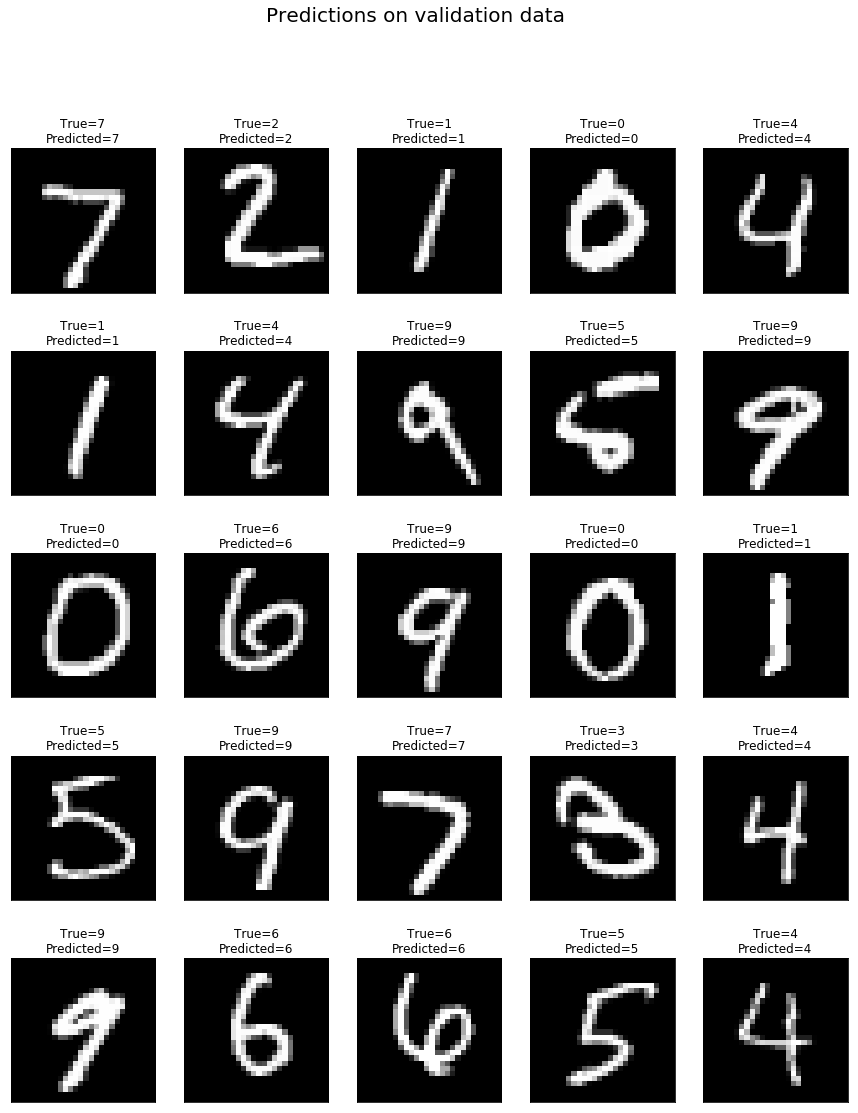

In [47]:
# visualize a few predictions on validation data
cols = 5
rows = 5
fig, ax = plt.subplots(rows, cols, figsize=(15, 18))
fig.suptitle("Predictions on validation data", fontsize=20)

v = 0
for row in range(0, rows): 
    for col in range(0, cols):
        ax[row][col].imshow(X_test[v], cmap="gray")
        title = "True=%s\nPredicted=%s" % (y_valid[v], y_predicted[v])
        if y_valid[v] != y_predicted[v]:
            title += " [X]"
        ax[row][col].set_title(title)
        ax[row][col].set_yticks([])
        ax[row][col].set_xticks([])
        v += 1

plt.show()